In [31]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [32]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [33]:
from Experiments.boston import Setup
setup=Setup(device)#, layerwidth=50)

# Target density #

In [63]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._modelè;

size_sample

303

# Generative Network #

In [72]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=5
GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [73]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=1000#size_sample

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .05, .000001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 1308225.5, Entropy 1564.958984375, Learning Rate: 0.05
Epoch [1/20000], Loss: 23345332.0, Entropy 1907.46142578125, Learning Rate: 0.05
Epoch [2/20000], Loss: 8618723.0, Entropy 1432.6884765625, Learning Rate: 0.05
Epoch [3/20000], Loss: 3605894.0, Entropy 1158.24365234375, Learning Rate: 0.05
Epoch [4/20000], Loss: 2740021.0, Entropy 1085.28759765625, Learning Rate: 0.05
Epoch [5/20000], Loss: 818921.6875, Entropy 928.4599609375, Learning Rate: 0.05
Epoch [6/20000], Loss: 1232181.625, Entropy 889.197265625, Learning Rate: 0.05
Epoch [7/20000], Loss: 1015265.5625, Entropy 900.58349609375, Learning Rate: 0.05
Epoch [8/20000], Loss: 2486869.75, Entropy 994.947265625, Learning Rate: 0.05
Epoch [9/20000], Loss: 1616295.5, Entropy 934.95947265625, Learning Rate: 0.05
Epoch [10/20000], Loss: 1936615.0, Entropy 985.00341796875, Learning Rate: 0.05
Epoch [11/20000], Loss: 3474036.5, Entropy 1042.548828125, Learning Rate: 0.05
Epoch [12/20000], Loss: 16031630.0, Entropy 1

Epoch [113/20000], Loss: 5467.380859375, Entropy -1065.970703125, Learning Rate: 0.05
Epoch [114/20000], Loss: 6004.0986328125, Entropy -1048.6611328125, Learning Rate: 0.05
Epoch [115/20000], Loss: 5532.4970703125, Entropy -1108.541015625, Learning Rate: 0.05
Epoch [116/20000], Loss: 5477.26953125, Entropy -1137.32177734375, Learning Rate: 0.05
Epoch [117/20000], Loss: 5503.1650390625, Entropy -1102.04736328125, Learning Rate: 0.05
Epoch [118/20000], Loss: 5807.994140625, Entropy -1180.16796875, Learning Rate: 0.05
Epoch [119/20000], Loss: 5676.892578125, Entropy -1100.67529296875, Learning Rate: 0.05
Epoch [120/20000], Loss: 5943.73876953125, Entropy -1016.95654296875, Learning Rate: 0.05
Epoch [121/20000], Loss: 5126.3125, Entropy -1219.4892578125, Learning Rate: 0.05
Epoch [122/20000], Loss: 5364.12939453125, Entropy -1104.7900390625, Learning Rate: 0.05
Epoch [123/20000], Loss: 5866.2109375, Entropy -1000.29541015625, Learning Rate: 0.05
Epoch [124/20000], Loss: 5519.4208984375, E

Epoch [215/20000], Loss: 4876.1494140625, Entropy -1475.437744140625, Learning Rate: 0.05
Epoch [216/20000], Loss: 5272.84765625, Entropy -1340.34375, Learning Rate: 0.05
Epoch [217/20000], Loss: 4764.28955078125, Entropy -1418.46435546875, Learning Rate: 0.05
Epoch [218/20000], Loss: 4907.568359375, Entropy -1298.51513671875, Learning Rate: 0.05
Epoch [219/20000], Loss: 4748.74560546875, Entropy -1476.103271484375, Learning Rate: 0.05
Epoch [220/20000], Loss: 4880.82275390625, Entropy -1378.77978515625, Learning Rate: 0.05
Epoch [221/20000], Loss: 4775.927734375, Entropy -1490.63427734375, Learning Rate: 0.05
Epoch [222/20000], Loss: 4753.654296875, Entropy -1412.0576171875, Learning Rate: 0.05
Epoch [223/20000], Loss: 4889.298828125, Entropy -1494.857421875, Learning Rate: 0.05
Epoch [224/20000], Loss: 4941.83984375, Entropy -1463.679931640625, Learning Rate: 0.05
Epoch [225/20000], Loss: 4474.96728515625, Entropy -1321.240234375, Learning Rate: 0.05
Epoch [226/20000], Loss: 4782.474

Epoch [317/20000], Loss: 4499.32421875, Entropy -1338.1982421875, Learning Rate: 0.05
Epoch [318/20000], Loss: 4752.8486328125, Entropy -1551.1884765625, Learning Rate: 0.05
Epoch [319/20000], Loss: 4547.81103515625, Entropy -1521.380859375, Learning Rate: 0.05
Epoch [320/20000], Loss: 4871.66943359375, Entropy -1481.945068359375, Learning Rate: 0.05
Epoch [321/20000], Loss: 4625.107421875, Entropy -1355.41650390625, Learning Rate: 0.05
Epoch [322/20000], Loss: 4668.25634765625, Entropy -1576.954833984375, Learning Rate: 0.05
Epoch [323/20000], Loss: 4722.9755859375, Entropy -1565.140869140625, Learning Rate: 0.05
Epoch [324/20000], Loss: 4771.02197265625, Entropy -1466.150634765625, Learning Rate: 0.05
Epoch [325/20000], Loss: 4688.8779296875, Entropy -1588.43212890625, Learning Rate: 0.05
Epoch [326/20000], Loss: 4853.140625, Entropy -1515.5244140625, Learning Rate: 0.05
Epoch [327/20000], Loss: 4638.74267578125, Entropy -1553.379638671875, Learning Rate: 0.05
Epoch [328/20000], Loss

Epoch [419/20000], Loss: 4702.76953125, Entropy -1514.965087890625, Learning Rate: 0.05
Epoch [420/20000], Loss: 4641.79248046875, Entropy -1698.807861328125, Learning Rate: 0.05
Epoch [421/20000], Loss: 4507.853515625, Entropy -1494.18798828125, Learning Rate: 0.05
Epoch [422/20000], Loss: 4667.18359375, Entropy -1520.654296875, Learning Rate: 0.05
Epoch [423/20000], Loss: 4539.4384765625, Entropy -1533.814453125, Learning Rate: 0.05
Epoch [424/20000], Loss: 4477.380859375, Entropy -1495.200927734375, Learning Rate: 0.05
Epoch [425/20000], Loss: 4844.5390625, Entropy -1493.4248046875, Learning Rate: 0.05
Epoch [426/20000], Loss: 4564.25732421875, Entropy -1597.63818359375, Learning Rate: 0.05
Epoch [427/20000], Loss: 4601.27001953125, Entropy -1606.13671875, Learning Rate: 0.05
Epoch [428/20000], Loss: 4588.65625, Entropy -1525.2626953125, Learning Rate: 0.05
Epoch [429/20000], Loss: 4529.7529296875, Entropy -1616.0400390625, Learning Rate: 0.05
Epoch [430/20000], Loss: 4536.729003906

Epoch [521/20000], Loss: 4689.26220703125, Entropy -1620.975830078125, Learning Rate: 0.05
Epoch [522/20000], Loss: 4486.03857421875, Entropy -1535.2314453125, Learning Rate: 0.05
Epoch [523/20000], Loss: 4628.279296875, Entropy -1559.988525390625, Learning Rate: 0.05
Epoch [524/20000], Loss: 4519.181640625, Entropy -1616.01953125, Learning Rate: 0.05
Epoch [525/20000], Loss: 4540.412109375, Entropy -1627.74169921875, Learning Rate: 0.05
Epoch [526/20000], Loss: 4431.19873046875, Entropy -1472.62939453125, Learning Rate: 0.05
Epoch [527/20000], Loss: 4604.13720703125, Entropy -1682.44384765625, Learning Rate: 0.05
Epoch [528/20000], Loss: 4430.73388671875, Entropy -1468.158203125, Learning Rate: 0.05
Epoch [529/20000], Loss: 4427.9013671875, Entropy -1493.2880859375, Learning Rate: 0.05
Epoch [530/20000], Loss: 4520.12646484375, Entropy -1459.7626953125, Learning Rate: 0.05
Epoch [531/20000], Loss: 4582.32275390625, Entropy -1621.96142578125, Learning Rate: 0.05
Epoch [532/20000], Loss

Epoch [622/20000], Loss: 4458.025390625, Entropy -1478.25146484375, Learning Rate: 0.05
Epoch [623/20000], Loss: 4474.66064453125, Entropy -1596.734130859375, Learning Rate: 0.05
Epoch [624/20000], Loss: 4492.4755859375, Entropy -1384.58642578125, Learning Rate: 0.05
Epoch [625/20000], Loss: 4499.236328125, Entropy -1558.16943359375, Learning Rate: 0.05
Epoch [626/20000], Loss: 4547.9375, Entropy -1593.452880859375, Learning Rate: 0.05
Epoch [627/20000], Loss: 4462.2822265625, Entropy -1517.4111328125, Learning Rate: 0.05
Epoch [628/20000], Loss: 4469.9697265625, Entropy -1552.320068359375, Learning Rate: 0.05
Epoch [629/20000], Loss: 4506.40380859375, Entropy -1492.229736328125, Learning Rate: 0.05
Epoch [630/20000], Loss: 4404.41162109375, Entropy -1426.079833984375, Learning Rate: 0.05
Epoch [631/20000], Loss: 4473.75146484375, Entropy -1555.669677734375, Learning Rate: 0.05
Epoch [632/20000], Loss: 4556.23291015625, Entropy -1625.6396484375, Learning Rate: 0.05
Epoch [633/20000], L

Epoch [724/20000], Loss: 4411.30908203125, Entropy -1549.25634765625, Learning Rate: 0.05
Epoch [725/20000], Loss: 4412.6494140625, Entropy -1315.45166015625, Learning Rate: 0.05
Epoch [726/20000], Loss: 4391.04296875, Entropy -1484.123291015625, Learning Rate: 0.05
Epoch [727/20000], Loss: 4451.11279296875, Entropy -1533.27587890625, Learning Rate: 0.05
Epoch [728/20000], Loss: 4419.798828125, Entropy -1412.7626953125, Learning Rate: 0.05
Epoch [729/20000], Loss: 4460.85888671875, Entropy -1477.859619140625, Learning Rate: 0.05
Epoch [730/20000], Loss: 4430.96484375, Entropy -1549.90478515625, Learning Rate: 0.05
Epoch [731/20000], Loss: 4461.80908203125, Entropy -1442.001708984375, Learning Rate: 0.05
Epoch [732/20000], Loss: 4483.77294921875, Entropy -1606.767333984375, Learning Rate: 0.05
Epoch [733/20000], Loss: 4398.66943359375, Entropy -1585.62255859375, Learning Rate: 0.05
Epoch [734/20000], Loss: 4282.76220703125, Entropy -1362.29443359375, Learning Rate: 0.05
Epoch [735/20000

Epoch [826/20000], Loss: 4445.90087890625, Entropy -1425.3583984375, Learning Rate: 0.05
Epoch [827/20000], Loss: 4498.4306640625, Entropy -1569.125, Learning Rate: 0.05
Epoch [828/20000], Loss: 4412.09130859375, Entropy -1414.51416015625, Learning Rate: 0.05
Epoch [829/20000], Loss: 4382.87109375, Entropy -1430.760009765625, Learning Rate: 0.05
Epoch [830/20000], Loss: 4394.4287109375, Entropy -1529.582275390625, Learning Rate: 0.05
Epoch [831/20000], Loss: 4443.5068359375, Entropy -1551.69140625, Learning Rate: 0.05
Epoch [832/20000], Loss: 4451.66357421875, Entropy -1587.96142578125, Learning Rate: 0.05
Epoch [833/20000], Loss: 4342.00341796875, Entropy -1574.521240234375, Learning Rate: 0.05
Epoch [834/20000], Loss: 4355.94921875, Entropy -1490.786865234375, Learning Rate: 0.05
Epoch [835/20000], Loss: 4414.30419921875, Entropy -1593.916015625, Learning Rate: 0.05
Epoch [836/20000], Loss: 4431.78466796875, Entropy -1381.88037109375, Learning Rate: 0.05
Epoch [837/20000], Loss: 4366

Epoch [928/20000], Loss: 4344.4462890625, Entropy -1306.52294921875, Learning Rate: 0.05
Epoch [929/20000], Loss: 4403.9296875, Entropy -1435.5810546875, Learning Rate: 0.05
Epoch [930/20000], Loss: 4364.10009765625, Entropy -1404.96630859375, Learning Rate: 0.05
Epoch [931/20000], Loss: 4361.65625, Entropy -1391.60400390625, Learning Rate: 0.05
Epoch [932/20000], Loss: 4383.7724609375, Entropy -1639.95849609375, Learning Rate: 0.05
Epoch [933/20000], Loss: 4423.5419921875, Entropy -1581.629150390625, Learning Rate: 0.05
Epoch [934/20000], Loss: 4492.416015625, Entropy -1493.959716796875, Learning Rate: 0.05
Epoch [935/20000], Loss: 4385.09716796875, Entropy -1590.801513671875, Learning Rate: 0.05
Epoch [936/20000], Loss: 4410.9775390625, Entropy -1378.955078125, Learning Rate: 0.05
Epoch [937/20000], Loss: 4374.97119140625, Entropy -1464.10302734375, Learning Rate: 0.05
Epoch [938/20000], Loss: 4316.44677734375, Entropy -1440.34814453125, Learning Rate: 0.05
Epoch [939/20000], Loss: 4

Epoch [1030/20000], Loss: 4363.29248046875, Entropy -1500.75537109375, Learning Rate: 0.05
Epoch [1031/20000], Loss: 4272.193359375, Entropy -1440.33740234375, Learning Rate: 0.05
Epoch [1032/20000], Loss: 4363.228515625, Entropy -1433.085205078125, Learning Rate: 0.05
Epoch [1033/20000], Loss: 4297.263671875, Entropy -1326.81201171875, Learning Rate: 0.05
Epoch [1034/20000], Loss: 4322.59912109375, Entropy -1469.1943359375, Learning Rate: 0.05
Epoch [1035/20000], Loss: 4429.53759765625, Entropy -1329.3671875, Learning Rate: 0.05
Epoch [1036/20000], Loss: 4394.70361328125, Entropy -1514.232421875, Learning Rate: 0.05
Epoch [1037/20000], Loss: 4380.8876953125, Entropy -1502.10986328125, Learning Rate: 0.05
Epoch [1038/20000], Loss: 4226.17138671875, Entropy -1287.80078125, Learning Rate: 0.05
Epoch [1039/20000], Loss: 4365.7587890625, Entropy -1456.55029296875, Learning Rate: 0.05
Epoch [1040/20000], Loss: 4283.88134765625, Entropy -1364.220703125, Learning Rate: 0.05
Epoch [1041/20000]

Epoch [1132/20000], Loss: 4276.951171875, Entropy -1381.8408203125, Learning Rate: 0.05
Epoch [1133/20000], Loss: 4374.61181640625, Entropy -1393.75634765625, Learning Rate: 0.05
Epoch [1134/20000], Loss: 4267.60888671875, Entropy -1388.4345703125, Learning Rate: 0.05
Epoch [1135/20000], Loss: 4419.80615234375, Entropy -1536.7939453125, Learning Rate: 0.05
Epoch [1136/20000], Loss: 4405.4384765625, Entropy -1612.64453125, Learning Rate: 0.05
Epoch [1137/20000], Loss: 4267.8466796875, Entropy -1340.11572265625, Learning Rate: 0.05
Epoch [1138/20000], Loss: 4326.96142578125, Entropy -1492.390869140625, Learning Rate: 0.05
Epoch [1139/20000], Loss: 4275.08935546875, Entropy -1417.21337890625, Learning Rate: 0.05
Epoch [1140/20000], Loss: 4320.10009765625, Entropy -1400.4140625, Learning Rate: 0.05
Epoch [1141/20000], Loss: 4346.49658203125, Entropy -1431.9111328125, Learning Rate: 0.05
Epoch [1142/20000], Loss: 4348.83349609375, Entropy -1466.381103515625, Learning Rate: 0.05
Epoch [1143/

Epoch [1232/20000], Loss: 4318.50146484375, Entropy -1444.4091796875, Learning Rate: 0.05
Epoch [1233/20000], Loss: 4298.55908203125, Entropy -1370.83984375, Learning Rate: 0.05
Epoch [1234/20000], Loss: 4344.9912109375, Entropy -1425.5419921875, Learning Rate: 0.05
Epoch [1235/20000], Loss: 4302.75732421875, Entropy -1226.4345703125, Learning Rate: 0.05
Epoch [1236/20000], Loss: 4293.6435546875, Entropy -1463.74755859375, Learning Rate: 0.05
Epoch [1237/20000], Loss: 4325.95654296875, Entropy -1339.802734375, Learning Rate: 0.05
Epoch [1238/20000], Loss: 4346.23486328125, Entropy -1449.022705078125, Learning Rate: 0.05
Epoch [1239/20000], Loss: 4293.048828125, Entropy -1424.063232421875, Learning Rate: 0.05
Epoch [1240/20000], Loss: 4351.64794921875, Entropy -1330.33349609375, Learning Rate: 0.05
Epoch [1241/20000], Loss: 4311.06103515625, Entropy -1461.25, Learning Rate: 0.05
Epoch [1242/20000], Loss: 4314.5830078125, Entropy -1321.92529296875, Learning Rate: 0.05
Epoch [1243/20000],

Epoch [1333/20000], Loss: 4222.17529296875, Entropy -1314.19091796875, Learning Rate: 0.05
Epoch [1334/20000], Loss: 4231.109375, Entropy -1420.247314453125, Learning Rate: 0.05
Epoch [1335/20000], Loss: 4290.83935546875, Entropy -1458.36328125, Learning Rate: 0.05
Epoch [1336/20000], Loss: 4256.35693359375, Entropy -1449.00927734375, Learning Rate: 0.05
Epoch [1337/20000], Loss: 4251.29443359375, Entropy -1425.931640625, Learning Rate: 0.05
Epoch [1338/20000], Loss: 4327.66943359375, Entropy -1363.50634765625, Learning Rate: 0.05
Epoch [1339/20000], Loss: 4324.51611328125, Entropy -1386.63818359375, Learning Rate: 0.05
Epoch [1340/20000], Loss: 4206.11376953125, Entropy -1383.75390625, Learning Rate: 0.05
Epoch [1341/20000], Loss: 4339.53857421875, Entropy -1508.85791015625, Learning Rate: 0.05
Epoch [1342/20000], Loss: 4282.9794921875, Entropy -1336.740234375, Learning Rate: 0.05
Epoch [1343/20000], Loss: 4210.09375, Entropy -1412.80712890625, Learning Rate: 0.05
Epoch [1344/20000], 

Epoch [1434/20000], Loss: 4303.3447265625, Entropy -1375.9833984375, Learning Rate: 0.05
Epoch [1435/20000], Loss: 4235.39208984375, Entropy -1364.79638671875, Learning Rate: 0.05
Epoch [1436/20000], Loss: 4214.22216796875, Entropy -1341.8740234375, Learning Rate: 0.05
Epoch [1437/20000], Loss: 4249.58251953125, Entropy -1384.04248046875, Learning Rate: 0.05
Epoch [1438/20000], Loss: 4259.4765625, Entropy -1387.54052734375, Learning Rate: 0.05
Epoch [1439/20000], Loss: 4196.939453125, Entropy -1325.43212890625, Learning Rate: 0.05
Epoch [1440/20000], Loss: 4134.822265625, Entropy -1309.61865234375, Learning Rate: 0.05
Epoch [1441/20000], Loss: 4320.56201171875, Entropy -1422.8212890625, Learning Rate: 0.05
Epoch [1442/20000], Loss: 4240.240234375, Entropy -1405.82958984375, Learning Rate: 0.05
Epoch [1443/20000], Loss: 4213.01123046875, Entropy -1372.13720703125, Learning Rate: 0.05
Epoch [1444/20000], Loss: 4223.60546875, Entropy -1417.39453125, Learning Rate: 0.05
Epoch [1445/20000],

Epoch [1534/20000], Loss: 4360.5390625, Entropy -1430.31787109375, Learning Rate: 0.05
Epoch [1535/20000], Loss: 4178.7412109375, Entropy -1339.84130859375, Learning Rate: 0.05
Epoch [1536/20000], Loss: 4167.40966796875, Entropy -1300.18994140625, Learning Rate: 0.05
Epoch [1537/20000], Loss: 4250.8935546875, Entropy -1383.08935546875, Learning Rate: 0.05
Epoch [1538/20000], Loss: 4276.78564453125, Entropy -1413.791015625, Learning Rate: 0.05
Epoch [1539/20000], Loss: 4222.810546875, Entropy -1285.884765625, Learning Rate: 0.05
Epoch [1540/20000], Loss: 4409.61669921875, Entropy -1318.46533203125, Learning Rate: 0.05
Epoch [1541/20000], Loss: 4321.26513671875, Entropy -1368.31884765625, Learning Rate: 0.05
Epoch [1542/20000], Loss: 4279.00146484375, Entropy -1337.048828125, Learning Rate: 0.05
Epoch [1543/20000], Loss: 4211.9814453125, Entropy -1378.2626953125, Learning Rate: 0.05
Epoch [1544/20000], Loss: 4204.45703125, Entropy -1399.171875, Learning Rate: 0.05
Epoch [1545/20000], Los

Epoch [1635/20000], Loss: 4268.25537109375, Entropy -1354.70947265625, Learning Rate: 0.05
Epoch [1636/20000], Loss: 4183.14501953125, Entropy -1306.05419921875, Learning Rate: 0.05
Epoch [1637/20000], Loss: 4214.91259765625, Entropy -1411.262939453125, Learning Rate: 0.05
Epoch [1638/20000], Loss: 4249.7705078125, Entropy -1424.610107421875, Learning Rate: 0.05
Epoch [1639/20000], Loss: 4248.27880859375, Entropy -1426.399658203125, Learning Rate: 0.05
Epoch [1640/20000], Loss: 4188.22265625, Entropy -1361.736328125, Learning Rate: 0.05
Epoch [1641/20000], Loss: 4256.96533203125, Entropy -1484.55029296875, Learning Rate: 0.05
Epoch [1642/20000], Loss: 4150.71826171875, Entropy -1263.025390625, Learning Rate: 0.05
Epoch [1643/20000], Loss: 4171.8388671875, Entropy -1345.0576171875, Learning Rate: 0.05
Epoch [1644/20000], Loss: 4208.38427734375, Entropy -1274.9931640625, Learning Rate: 0.05
Epoch [1645/20000], Loss: 4219.10986328125, Entropy -1371.56005859375, Learning Rate: 0.05
Epoch [

Epoch [1736/20000], Loss: 4171.40478515625, Entropy -1349.65966796875, Learning Rate: 0.05
Epoch [1737/20000], Loss: 4267.45947265625, Entropy -1391.82470703125, Learning Rate: 0.05
Epoch [1738/20000], Loss: 4227.97119140625, Entropy -1256.85693359375, Learning Rate: 0.05
Epoch [1739/20000], Loss: 4264.2294921875, Entropy -1380.85009765625, Learning Rate: 0.05
Epoch [1740/20000], Loss: 4310.27880859375, Entropy -1443.87939453125, Learning Rate: 0.05
Epoch [1741/20000], Loss: 4270.3515625, Entropy -1405.25341796875, Learning Rate: 0.05
Epoch [1742/20000], Loss: 4219.70458984375, Entropy -1410.471923828125, Learning Rate: 0.05
Epoch [1743/20000], Loss: 4205.15185546875, Entropy -1339.4638671875, Learning Rate: 0.05
Epoch [1744/20000], Loss: 4233.24951171875, Entropy -1428.420166015625, Learning Rate: 0.05
Epoch [1745/20000], Loss: 4189.87890625, Entropy -1397.1162109375, Learning Rate: 0.05
Epoch [1746/20000], Loss: 4173.18798828125, Entropy -1302.0771484375, Learning Rate: 0.05
Epoch [1

Epoch [1835/20000], Loss: 4145.4775390625, Entropy -1365.505859375, Learning Rate: 0.025
Epoch [1836/20000], Loss: 4202.55712890625, Entropy -1308.69091796875, Learning Rate: 0.025
Epoch [1837/20000], Loss: 4187.28076171875, Entropy -1266.97412109375, Learning Rate: 0.025
Epoch [1838/20000], Loss: 4180.27587890625, Entropy -1327.78857421875, Learning Rate: 0.025
Epoch [1839/20000], Loss: 4198.74755859375, Entropy -1384.92724609375, Learning Rate: 0.025
Epoch [1840/20000], Loss: 4121.82177734375, Entropy -1294.15283203125, Learning Rate: 0.025
Epoch [1841/20000], Loss: 4177.513671875, Entropy -1322.38818359375, Learning Rate: 0.025
Epoch [1842/20000], Loss: 4176.50048828125, Entropy -1345.33740234375, Learning Rate: 0.025
Epoch [1843/20000], Loss: 4253.80517578125, Entropy -1394.62890625, Learning Rate: 0.025
Epoch [1844/20000], Loss: 4129.36279296875, Entropy -1207.2783203125, Learning Rate: 0.025
Epoch [1845/20000], Loss: 4170.02197265625, Entropy -1219.974609375, Learning Rate: 0.025

Epoch [1937/20000], Loss: 4107.06396484375, Entropy -1260.70458984375, Learning Rate: 0.025
Epoch [1938/20000], Loss: 4114.66162109375, Entropy -1195.296875, Learning Rate: 0.025
Epoch [1939/20000], Loss: 4153.38330078125, Entropy -1398.781005859375, Learning Rate: 0.025
Epoch [1940/20000], Loss: 4167.85205078125, Entropy -1261.9521484375, Learning Rate: 0.025
Epoch [1941/20000], Loss: 4206.88427734375, Entropy -1215.65673828125, Learning Rate: 0.025
Epoch [1942/20000], Loss: 4143.91162109375, Entropy -1260.65869140625, Learning Rate: 0.025
Epoch [1943/20000], Loss: 4117.3193359375, Entropy -1277.26318359375, Learning Rate: 0.025
Epoch [1944/20000], Loss: 4089.144775390625, Entropy -1200.1708984375, Learning Rate: 0.025
Epoch [1945/20000], Loss: 4232.552734375, Entropy -1286.16064453125, Learning Rate: 0.025
Epoch [1946/20000], Loss: 4173.25634765625, Entropy -1301.9091796875, Learning Rate: 0.025
Epoch [1947/20000], Loss: 4147.48193359375, Entropy -1367.5380859375, Learning Rate: 0.02

Epoch [2039/20000], Loss: 4129.2763671875, Entropy -1235.13232421875, Learning Rate: 0.025
Epoch [2040/20000], Loss: 4232.03857421875, Entropy -1289.966796875, Learning Rate: 0.025
Epoch [2041/20000], Loss: 4162.8486328125, Entropy -1433.00732421875, Learning Rate: 0.025
Epoch [2042/20000], Loss: 4155.1708984375, Entropy -1354.48291015625, Learning Rate: 0.025
Epoch [2043/20000], Loss: 4179.19189453125, Entropy -1293.8681640625, Learning Rate: 0.025
Epoch [2044/20000], Loss: 4177.431640625, Entropy -1417.571533203125, Learning Rate: 0.025
Epoch [2045/20000], Loss: 4196.69775390625, Entropy -1377.49267578125, Learning Rate: 0.025
Epoch [2046/20000], Loss: 4143.07861328125, Entropy -1303.4931640625, Learning Rate: 0.025
Epoch [2047/20000], Loss: 4249.1435546875, Entropy -1310.3828125, Learning Rate: 0.025
Epoch [2048/20000], Loss: 4116.88427734375, Entropy -1189.57861328125, Learning Rate: 0.025
Epoch [2049/20000], Loss: 4171.1044921875, Entropy -1287.9833984375, Learning Rate: 0.025
Epo

Epoch [2141/20000], Loss: 4174.75, Entropy -1342.23974609375, Learning Rate: 0.0125
Epoch [2142/20000], Loss: 4122.029296875, Entropy -1233.18798828125, Learning Rate: 0.0125
Epoch [2143/20000], Loss: 4157.146484375, Entropy -1369.56005859375, Learning Rate: 0.0125
Epoch [2144/20000], Loss: 4137.2841796875, Entropy -1296.623046875, Learning Rate: 0.0125
Epoch [2145/20000], Loss: 4143.54150390625, Entropy -1217.2802734375, Learning Rate: 0.0125
Epoch [2146/20000], Loss: 4205.13916015625, Entropy -1375.06640625, Learning Rate: 0.0125
Epoch [2147/20000], Loss: 4154.7412109375, Entropy -1317.55419921875, Learning Rate: 0.0125
Epoch [2148/20000], Loss: 4238.84033203125, Entropy -1294.896484375, Learning Rate: 0.0125
Epoch [2149/20000], Loss: 4124.0673828125, Entropy -1314.6943359375, Learning Rate: 0.0125
Epoch [2150/20000], Loss: 4145.64404296875, Entropy -1239.5361328125, Learning Rate: 0.0125
Epoch [2151/20000], Loss: 4077.592041015625, Entropy -1302.70361328125, Learning Rate: 0.0125
Ep

Epoch [2243/20000], Loss: 4152.0498046875, Entropy -1301.1904296875, Learning Rate: 0.0125
Epoch [2244/20000], Loss: 4113.42431640625, Entropy -1367.83056640625, Learning Rate: 0.0125
Epoch [2245/20000], Loss: 4126.5439453125, Entropy -1287.75048828125, Learning Rate: 0.0125
Epoch [2246/20000], Loss: 4098.9296875, Entropy -1173.0927734375, Learning Rate: 0.0125
Epoch [2247/20000], Loss: 4124.5263671875, Entropy -1244.45703125, Learning Rate: 0.0125
Epoch [2248/20000], Loss: 4174.794921875, Entropy -1350.61083984375, Learning Rate: 0.0125
Epoch [2249/20000], Loss: 4087.468017578125, Entropy -1263.32958984375, Learning Rate: 0.0125
Epoch [2250/20000], Loss: 4101.65283203125, Entropy -1172.94873046875, Learning Rate: 0.0125
Epoch [2251/20000], Loss: 4139.6474609375, Entropy -1343.09912109375, Learning Rate: 0.0125
Epoch [2252/20000], Loss: 4076.27978515625, Entropy -1217.61181640625, Learning Rate: 0.0125
Epoch [2253/20000], Loss: 4110.18115234375, Entropy -1238.81005859375, Learning Rate

Epoch [2345/20000], Loss: 4218.37451171875, Entropy -1379.51708984375, Learning Rate: 0.00625
Epoch [2346/20000], Loss: 4130.37109375, Entropy -1261.97412109375, Learning Rate: 0.00625
Epoch [2347/20000], Loss: 4128.45166015625, Entropy -1276.4462890625, Learning Rate: 0.00625
Epoch [2348/20000], Loss: 4111.68896484375, Entropy -1225.22802734375, Learning Rate: 0.00625
Epoch [2349/20000], Loss: 4085.28759765625, Entropy -1229.46337890625, Learning Rate: 0.00625
Epoch [2350/20000], Loss: 4247.39599609375, Entropy -1366.67724609375, Learning Rate: 0.00625
Epoch [2351/20000], Loss: 4190.43310546875, Entropy -1288.880859375, Learning Rate: 0.00625
Epoch [2352/20000], Loss: 4091.47314453125, Entropy -1333.62255859375, Learning Rate: 0.00625
Epoch [2353/20000], Loss: 4118.978515625, Entropy -1296.388671875, Learning Rate: 0.00625
Epoch [2354/20000], Loss: 4137.90673828125, Entropy -1276.70263671875, Learning Rate: 0.00625
Epoch [2355/20000], Loss: 4180.80078125, Entropy -1314.7548828125, Lea

Epoch [2447/20000], Loss: 4121.49560546875, Entropy -1272.15869140625, Learning Rate: 0.00625
Epoch [2448/20000], Loss: 4170.11474609375, Entropy -1202.14453125, Learning Rate: 0.00625
Epoch [2449/20000], Loss: 4147.9482421875, Entropy -1395.154296875, Learning Rate: 0.00625
Epoch [2450/20000], Loss: 4116.6435546875, Entropy -1294.6123046875, Learning Rate: 0.00625
Epoch [2451/20000], Loss: 4126.22119140625, Entropy -1150.78173828125, Learning Rate: 0.00625
Epoch [2452/20000], Loss: 4238.798828125, Entropy -1301.66650390625, Learning Rate: 0.00625
Epoch [2453/20000], Loss: 4151.1279296875, Entropy -1350.2275390625, Learning Rate: 0.00625
Epoch [2454/20000], Loss: 4129.166015625, Entropy -1305.04541015625, Learning Rate: 0.00625
Epoch [2455/20000], Loss: 4170.78271484375, Entropy -1364.21630859375, Learning Rate: 0.00625
Epoch [2456/20000], Loss: 4146.033203125, Entropy -1335.58447265625, Learning Rate: 0.00625
Epoch [2457/20000], Loss: 4142.96435546875, Entropy -1205.423828125, Learnin

Epoch [2549/20000], Loss: 4114.2998046875, Entropy -1324.83349609375, Learning Rate: 0.00625
Epoch [2550/20000], Loss: 4169.1103515625, Entropy -1401.40234375, Learning Rate: 0.00625
Epoch [2551/20000], Loss: 4138.25, Entropy -1322.19580078125, Learning Rate: 0.00625
Epoch [2552/20000], Loss: 4132.3212890625, Entropy -1315.48974609375, Learning Rate: 0.00625
Epoch [2553/20000], Loss: 4132.5361328125, Entropy -1326.71923828125, Learning Rate: 0.00625
Epoch [2554/20000], Loss: 4127.83447265625, Entropy -1222.072265625, Learning Rate: 0.00625
Epoch [2555/20000], Loss: 4121.6484375, Entropy -1233.64013671875, Learning Rate: 0.00625
Epoch [2556/20000], Loss: 4147.74853515625, Entropy -1319.66748046875, Learning Rate: 0.00625
Epoch [2557/20000], Loss: 4114.54541015625, Entropy -1265.22216796875, Learning Rate: 0.00625
Epoch [2558/20000], Loss: 4076.65576171875, Entropy -1247.2626953125, Learning Rate: 0.00625
Epoch [2559/20000], Loss: 4080.716064453125, Entropy -1210.2724609375, Learning Rat

Epoch [2651/20000], Loss: 4139.1318359375, Entropy -1349.9599609375, Learning Rate: 0.003125
Epoch [2652/20000], Loss: 4090.745849609375, Entropy -1304.384765625, Learning Rate: 0.003125
Epoch [2653/20000], Loss: 4130.7802734375, Entropy -1241.18310546875, Learning Rate: 0.003125
Epoch [2654/20000], Loss: 4151.71728515625, Entropy -1348.18505859375, Learning Rate: 0.003125
Epoch [2655/20000], Loss: 4149.380859375, Entropy -1319.61962890625, Learning Rate: 0.003125
Epoch [2656/20000], Loss: 4123.32275390625, Entropy -1306.66552734375, Learning Rate: 0.003125
Epoch [2657/20000], Loss: 4189.2509765625, Entropy -1424.228271484375, Learning Rate: 0.003125
Epoch [2658/20000], Loss: 4207.3662109375, Entropy -1293.359375, Learning Rate: 0.003125
Epoch [2659/20000], Loss: 4116.67578125, Entropy -1261.17333984375, Learning Rate: 0.003125
Epoch [2660/20000], Loss: 4109.24951171875, Entropy -1259.62744140625, Learning Rate: 0.003125
Epoch [2661/20000], Loss: 4137.65869140625, Entropy -1227.1987304

Epoch [2753/20000], Loss: 4196.0556640625, Entropy -1284.48486328125, Learning Rate: 0.003125
Epoch [2754/20000], Loss: 4146.49072265625, Entropy -1325.111328125, Learning Rate: 0.003125
Epoch [2755/20000], Loss: 4123.45849609375, Entropy -1298.4521484375, Learning Rate: 0.003125
Epoch [2756/20000], Loss: 4125.27880859375, Entropy -1352.32861328125, Learning Rate: 0.003125
Epoch [2757/20000], Loss: 4120.7607421875, Entropy -1199.85986328125, Learning Rate: 0.003125
Epoch [2758/20000], Loss: 4132.8662109375, Entropy -1298.9228515625, Learning Rate: 0.003125
Epoch [2759/20000], Loss: 4188.048828125, Entropy -1400.04541015625, Learning Rate: 0.003125
Epoch [2760/20000], Loss: 4093.42333984375, Entropy -1171.74462890625, Learning Rate: 0.003125
Epoch [2761/20000], Loss: 4112.83837890625, Entropy -1252.90380859375, Learning Rate: 0.003125
Epoch [2762/20000], Loss: 4087.149169921875, Entropy -1263.82958984375, Learning Rate: 0.003125
Epoch [2763/20000], Loss: 4144.021484375, Entropy -1290.10

Epoch [2855/20000], Loss: 4132.0361328125, Entropy -1242.08056640625, Learning Rate: 0.0015625
Epoch [2856/20000], Loss: 4118.07568359375, Entropy -1330.77685546875, Learning Rate: 0.0015625
Epoch [2857/20000], Loss: 4112.81005859375, Entropy -1313.458984375, Learning Rate: 0.0015625
Epoch [2858/20000], Loss: 4034.923828125, Entropy -1236.55419921875, Learning Rate: 0.0015625
Epoch [2859/20000], Loss: 4192.02392578125, Entropy -1312.04248046875, Learning Rate: 0.0015625
Epoch [2860/20000], Loss: 4068.5107421875, Entropy -1229.28515625, Learning Rate: 0.0015625
Epoch [2861/20000], Loss: 4165.80712890625, Entropy -1323.09423828125, Learning Rate: 0.0015625
Epoch [2862/20000], Loss: 4189.2919921875, Entropy -1301.70068359375, Learning Rate: 0.0015625
Epoch [2863/20000], Loss: 4113.2158203125, Entropy -1257.19677734375, Learning Rate: 0.0015625
Epoch [2864/20000], Loss: 4103.7177734375, Entropy -1268.30029296875, Learning Rate: 0.0015625
Epoch [2865/20000], Loss: 4120.23876953125, Entropy 

Epoch [2957/20000], Loss: 4122.17333984375, Entropy -1270.77197265625, Learning Rate: 0.0015625
Epoch [2958/20000], Loss: 4149.984375, Entropy -1307.97705078125, Learning Rate: 0.0015625
Epoch [2959/20000], Loss: 4084.848388671875, Entropy -1259.65087890625, Learning Rate: 0.0015625
Epoch [2960/20000], Loss: 4143.939453125, Entropy -1271.279296875, Learning Rate: 0.0015625
Epoch [2961/20000], Loss: 4155.68505859375, Entropy -1368.70166015625, Learning Rate: 0.0015625
Epoch [2962/20000], Loss: 4237.13427734375, Entropy -1419.832275390625, Learning Rate: 0.0015625
Epoch [2963/20000], Loss: 4087.73388671875, Entropy -1334.84033203125, Learning Rate: 0.0015625
Epoch [2964/20000], Loss: 4100.787109375, Entropy -1299.57275390625, Learning Rate: 0.0015625
Epoch [2965/20000], Loss: 4104.65966796875, Entropy -1302.39306640625, Learning Rate: 0.0015625
Epoch [2966/20000], Loss: 4184.962890625, Entropy -1313.05419921875, Learning Rate: 0.0015625
Epoch [2967/20000], Loss: 4093.756103515625, Entrop

Epoch [3059/20000], Loss: 4115.6640625, Entropy -1254.74072265625, Learning Rate: 0.00078125
Epoch [3060/20000], Loss: 4102.30224609375, Entropy -1221.65966796875, Learning Rate: 0.00078125
Epoch [3061/20000], Loss: 4119.42236328125, Entropy -1320.50830078125, Learning Rate: 0.00078125
Epoch [3062/20000], Loss: 4121.6396484375, Entropy -1235.6953125, Learning Rate: 0.00078125
Epoch [3063/20000], Loss: 4089.31103515625, Entropy -1258.27294921875, Learning Rate: 0.00078125
Epoch [3064/20000], Loss: 4089.916015625, Entropy -1238.52294921875, Learning Rate: 0.00078125
Epoch [3065/20000], Loss: 4183.21240234375, Entropy -1225.1298828125, Learning Rate: 0.00078125
Epoch [3066/20000], Loss: 4113.078125, Entropy -1375.07470703125, Learning Rate: 0.00078125
Epoch [3067/20000], Loss: 4071.9482421875, Entropy -1141.35693359375, Learning Rate: 0.00078125
Epoch [3068/20000], Loss: 4085.1865234375, Entropy -1177.46630859375, Learning Rate: 0.00078125
Epoch [3069/20000], Loss: 4092.139404296875, Entr

Epoch [3161/20000], Loss: 4030.943115234375, Entropy -1181.76806640625, Learning Rate: 0.00078125
Epoch [3162/20000], Loss: 4136.29345703125, Entropy -1179.0087890625, Learning Rate: 0.00078125
Epoch [3163/20000], Loss: 4159.5087890625, Entropy -1295.61181640625, Learning Rate: 0.00078125
Epoch [3164/20000], Loss: 4103.9873046875, Entropy -1274.91943359375, Learning Rate: 0.00078125
Epoch [3165/20000], Loss: 4165.24951171875, Entropy -1316.1103515625, Learning Rate: 0.00078125
Epoch [3166/20000], Loss: 4137.291015625, Entropy -1356.38916015625, Learning Rate: 0.00078125
Epoch [3167/20000], Loss: 4115.53125, Entropy -1278.02392578125, Learning Rate: 0.00078125
Epoch [3168/20000], Loss: 4157.22119140625, Entropy -1261.404296875, Learning Rate: 0.00078125
Epoch [3169/20000], Loss: 4173.8125, Entropy -1168.61767578125, Learning Rate: 0.00078125
Epoch [3170/20000], Loss: 4091.794677734375, Entropy -1107.015625, Learning Rate: 0.00078125
Epoch [3171/20000], Loss: 4136.4736328125, Entropy -11

Epoch [3263/20000], Loss: 4173.65283203125, Entropy -1394.310791015625, Learning Rate: 0.000390625
Epoch [3264/20000], Loss: 4091.84814453125, Entropy -1317.7646484375, Learning Rate: 0.000390625
Epoch [3265/20000], Loss: 4193.783203125, Entropy -1329.1376953125, Learning Rate: 0.000390625
Epoch [3266/20000], Loss: 4149.15869140625, Entropy -1344.27392578125, Learning Rate: 0.000390625
Epoch [3267/20000], Loss: 4044.108154296875, Entropy -1255.83642578125, Learning Rate: 0.000390625
Epoch [3268/20000], Loss: 4118.3701171875, Entropy -1328.37060546875, Learning Rate: 0.000390625
Epoch [3269/20000], Loss: 4186.34716796875, Entropy -1310.60009765625, Learning Rate: 0.000390625
Epoch [3270/20000], Loss: 4127.7568359375, Entropy -1293.99169921875, Learning Rate: 0.000390625
Epoch [3271/20000], Loss: 4073.308349609375, Entropy -1136.18701171875, Learning Rate: 0.000390625
Epoch [3272/20000], Loss: 4093.936279296875, Entropy -1281.8798828125, Learning Rate: 0.000390625
Epoch [3273/20000], Los

Epoch [3348/20000], Loss: 4094.306884765625, Entropy -1289.18603515625, Learning Rate: 0.000390625
Epoch [3349/20000], Loss: 4109.22412109375, Entropy -1298.2763671875, Learning Rate: 0.000390625
Epoch [3350/20000], Loss: 4126.775390625, Entropy -1261.18212890625, Learning Rate: 0.000390625
Epoch [3351/20000], Loss: 4082.9580078125, Entropy -1311.26123046875, Learning Rate: 0.000390625
Epoch [3352/20000], Loss: 4139.7978515625, Entropy -1295.61572265625, Learning Rate: 0.000390625
Epoch [3353/20000], Loss: 4088.662353515625, Entropy -1118.64697265625, Learning Rate: 0.000390625
Epoch [3354/20000], Loss: 4104.20166015625, Entropy -1252.74072265625, Learning Rate: 0.000390625
Epoch [3355/20000], Loss: 4097.71630859375, Entropy -1205.96728515625, Learning Rate: 0.000390625
Epoch [3356/20000], Loss: 4115.3837890625, Entropy -1258.4140625, Learning Rate: 0.000390625
Epoch [3357/20000], Loss: 4150.75244140625, Entropy -1273.798828125, Learning Rate: 0.000390625
Epoch [3358/20000], Loss: 4086

Epoch [3433/20000], Loss: 4091.19287109375, Entropy -1310.37744140625, Learning Rate: 0.0001953125
Epoch [3434/20000], Loss: 4100.7236328125, Entropy -1212.83349609375, Learning Rate: 0.0001953125
Epoch [3435/20000], Loss: 4088.4541015625, Entropy -1282.87255859375, Learning Rate: 0.0001953125
Epoch [3436/20000], Loss: 4089.675537109375, Entropy -1272.74560546875, Learning Rate: 0.0001953125
Epoch [3437/20000], Loss: 4123.12841796875, Entropy -1285.10400390625, Learning Rate: 0.0001953125
Epoch [3438/20000], Loss: 4137.65234375, Entropy -1384.51708984375, Learning Rate: 0.0001953125
Epoch [3439/20000], Loss: 4140.24462890625, Entropy -1288.205078125, Learning Rate: 0.0001953125
Epoch [3440/20000], Loss: 4098.580078125, Entropy -1217.89990234375, Learning Rate: 0.0001953125
Epoch [3441/20000], Loss: 4144.78173828125, Entropy -1305.2705078125, Learning Rate: 0.0001953125
Epoch [3442/20000], Loss: 4097.03662109375, Entropy -1237.27099609375, Learning Rate: 0.0001953125
Epoch [3443/20000],

Epoch [3518/20000], Loss: 4122.30615234375, Entropy -1358.56884765625, Learning Rate: 0.0001953125
Epoch [3519/20000], Loss: 4072.994140625, Entropy -1304.00146484375, Learning Rate: 0.0001953125
Epoch [3520/20000], Loss: 4175.6904296875, Entropy -1289.48583984375, Learning Rate: 0.0001953125
Epoch [3521/20000], Loss: 4127.34375, Entropy -1185.21630859375, Learning Rate: 0.0001953125
Epoch [3522/20000], Loss: 4106.150390625, Entropy -1280.6123046875, Learning Rate: 0.0001953125
Epoch [3523/20000], Loss: 4135.537109375, Entropy -1271.47509765625, Learning Rate: 0.0001953125
Epoch [3524/20000], Loss: 4084.2294921875, Entropy -1289.05419921875, Learning Rate: 0.0001953125
Epoch [3525/20000], Loss: 4174.03173828125, Entropy -1359.44091796875, Learning Rate: 0.0001953125
Epoch [3526/20000], Loss: 4198.4482421875, Entropy -1454.34619140625, Learning Rate: 0.0001953125
Epoch [3527/20000], Loss: 4159.8203125, Entropy -1370.4736328125, Learning Rate: 0.0001953125
Epoch [3528/20000], Loss: 4142.

Epoch [3619/20000], Loss: 4094.220703125, Entropy -1236.37548828125, Learning Rate: 9.765625e-05
Epoch [3620/20000], Loss: 4119.57666015625, Entropy -1262.76513671875, Learning Rate: 9.765625e-05
Epoch [3621/20000], Loss: 4128.95166015625, Entropy -1284.43408203125, Learning Rate: 9.765625e-05
Epoch [3622/20000], Loss: 4070.636962890625, Entropy -1239.87939453125, Learning Rate: 9.765625e-05
Epoch [3623/20000], Loss: 4101.40380859375, Entropy -1226.6162109375, Learning Rate: 9.765625e-05
Epoch [3624/20000], Loss: 4144.81396484375, Entropy -1313.60791015625, Learning Rate: 9.765625e-05
Epoch [3625/20000], Loss: 4117.681640625, Entropy -1256.96435546875, Learning Rate: 9.765625e-05
Epoch [3626/20000], Loss: 4122.78564453125, Entropy -1349.26953125, Learning Rate: 9.765625e-05
Epoch [3627/20000], Loss: 4154.23291015625, Entropy -1353.59130859375, Learning Rate: 9.765625e-05
Epoch [3628/20000], Loss: 4138.0322265625, Entropy -1182.6943359375, Learning Rate: 9.765625e-05
Epoch [3629/20000],

Epoch [3704/20000], Loss: 4148.62109375, Entropy -1253.3583984375, Learning Rate: 9.765625e-05
Epoch [3705/20000], Loss: 4102.22216796875, Entropy -1294.40185546875, Learning Rate: 9.765625e-05
Epoch [3706/20000], Loss: 4144.19580078125, Entropy -1327.12451171875, Learning Rate: 9.765625e-05
Epoch [3707/20000], Loss: 4139.58544921875, Entropy -1324.10009765625, Learning Rate: 9.765625e-05
Epoch [3708/20000], Loss: 4110.841796875, Entropy -1323.63525390625, Learning Rate: 9.765625e-05
Epoch [3709/20000], Loss: 4111.56201171875, Entropy -1289.95849609375, Learning Rate: 9.765625e-05
Epoch [3710/20000], Loss: 4147.96142578125, Entropy -1350.80419921875, Learning Rate: 9.765625e-05
Epoch [3711/20000], Loss: 4172.9169921875, Entropy -1403.227294921875, Learning Rate: 9.765625e-05
Epoch [3712/20000], Loss: 4178.3984375, Entropy -1396.115478515625, Learning Rate: 9.765625e-05
Epoch [3713/20000], Loss: 4136.1123046875, Entropy -1191.9326171875, Learning Rate: 9.765625e-05
Epoch [3714/20000], L

Epoch [3789/20000], Loss: 4103.2666015625, Entropy -1183.57958984375, Learning Rate: 9.765625e-05
Epoch [3790/20000], Loss: 4147.47998046875, Entropy -1220.61181640625, Learning Rate: 9.765625e-05
Epoch [3791/20000], Loss: 4130.359375, Entropy -1251.361328125, Learning Rate: 9.765625e-05
Epoch [3792/20000], Loss: 4144.2099609375, Entropy -1392.361572265625, Learning Rate: 9.765625e-05
Epoch [3793/20000], Loss: 4064.44970703125, Entropy -1223.53466796875, Learning Rate: 9.765625e-05
Epoch [3794/20000], Loss: 4086.0966796875, Entropy -1177.99267578125, Learning Rate: 9.765625e-05
Epoch [3795/20000], Loss: 4087.0390625, Entropy -1238.974609375, Learning Rate: 9.765625e-05
Epoch [3796/20000], Loss: 4116.81005859375, Entropy -1258.6376953125, Learning Rate: 9.765625e-05
Epoch [3797/20000], Loss: 4108.2109375, Entropy -1309.46826171875, Learning Rate: 9.765625e-05
Epoch [3798/20000], Loss: 4095.073974609375, Entropy -1350.44140625, Learning Rate: 9.765625e-05
Epoch [3799/20000], Loss: 4102.3

Epoch [3874/20000], Loss: 4078.39794921875, Entropy -1227.51806640625, Learning Rate: 4.8828125e-05
Epoch [3875/20000], Loss: 4140.2509765625, Entropy -1336.1025390625, Learning Rate: 4.8828125e-05
Epoch [3876/20000], Loss: 4108.9130859375, Entropy -1307.072265625, Learning Rate: 4.8828125e-05
Epoch [3877/20000], Loss: 4148.09912109375, Entropy -1320.7275390625, Learning Rate: 4.8828125e-05
Epoch [3878/20000], Loss: 4180.783203125, Entropy -1211.8837890625, Learning Rate: 4.8828125e-05
Epoch [3879/20000], Loss: 4220.333984375, Entropy -1183.994140625, Learning Rate: 4.8828125e-05
Epoch [3880/20000], Loss: 4165.13623046875, Entropy -1378.041015625, Learning Rate: 4.8828125e-05
Epoch [3881/20000], Loss: 4108.73095703125, Entropy -1288.45947265625, Learning Rate: 4.8828125e-05
Epoch [3882/20000], Loss: 4157.734375, Entropy -1342.27392578125, Learning Rate: 4.8828125e-05
Epoch [3883/20000], Loss: 4156.88916015625, Entropy -1185.66650390625, Learning Rate: 4.8828125e-05
Epoch [3884/20000], 

Epoch [3959/20000], Loss: 4067.131103515625, Entropy -1270.07958984375, Learning Rate: 4.8828125e-05
Epoch [3960/20000], Loss: 4129.228515625, Entropy -1294.67529296875, Learning Rate: 4.8828125e-05
Epoch [3961/20000], Loss: 4103.9287109375, Entropy -1233.83447265625, Learning Rate: 4.8828125e-05
Epoch [3962/20000], Loss: 4149.02490234375, Entropy -1360.05517578125, Learning Rate: 4.8828125e-05
Epoch [3963/20000], Loss: 4125.8701171875, Entropy -1317.689453125, Learning Rate: 4.8828125e-05
Epoch [3964/20000], Loss: 4121.0244140625, Entropy -1258.0908203125, Learning Rate: 4.8828125e-05
Epoch [3965/20000], Loss: 4183.4052734375, Entropy -1213.27294921875, Learning Rate: 4.8828125e-05
Epoch [3966/20000], Loss: 4103.55810546875, Entropy -1184.59619140625, Learning Rate: 4.8828125e-05
Epoch [3967/20000], Loss: 4085.104736328125, Entropy -1304.04296875, Learning Rate: 4.8828125e-05
Epoch [3968/20000], Loss: 4152.83984375, Entropy -1299.18017578125, Learning Rate: 4.8828125e-05
Epoch [3969/2

Epoch [4044/20000], Loss: 4088.69970703125, Entropy -1256.1708984375, Learning Rate: 2.44140625e-05
Epoch [4045/20000], Loss: 4122.16650390625, Entropy -1270.82421875, Learning Rate: 2.44140625e-05
Epoch [4046/20000], Loss: 4136.19482421875, Entropy -1267.6259765625, Learning Rate: 2.44140625e-05
Epoch [4047/20000], Loss: 4111.6103515625, Entropy -1214.44482421875, Learning Rate: 2.44140625e-05
Epoch [4048/20000], Loss: 4161.1630859375, Entropy -1400.40966796875, Learning Rate: 2.44140625e-05
Epoch [4049/20000], Loss: 4061.40283203125, Entropy -1225.82373046875, Learning Rate: 2.44140625e-05
Epoch [4050/20000], Loss: 4048.879638671875, Entropy -1183.90966796875, Learning Rate: 2.44140625e-05
Epoch [4051/20000], Loss: 4062.73388671875, Entropy -1234.90234375, Learning Rate: 2.44140625e-05
Epoch [4052/20000], Loss: 4161.6884765625, Entropy -1307.07861328125, Learning Rate: 2.44140625e-05
Epoch [4053/20000], Loss: 4088.94140625, Entropy -1274.23828125, Learning Rate: 2.44140625e-05
Epoch 

Epoch [4129/20000], Loss: 4079.14306640625, Entropy -1219.85546875, Learning Rate: 2.44140625e-05
Epoch [4130/20000], Loss: 4165.400390625, Entropy -1244.1396484375, Learning Rate: 2.44140625e-05
Epoch [4131/20000], Loss: 4082.876220703125, Entropy -1142.95068359375, Learning Rate: 2.44140625e-05
Epoch [4132/20000], Loss: 4133.26123046875, Entropy -1383.76708984375, Learning Rate: 2.44140625e-05
Epoch [4133/20000], Loss: 4079.803466796875, Entropy -1166.53515625, Learning Rate: 2.44140625e-05
Epoch [4134/20000], Loss: 4099.3955078125, Entropy -1267.6318359375, Learning Rate: 2.44140625e-05
Epoch [4135/20000], Loss: 4143.20263671875, Entropy -1199.05126953125, Learning Rate: 2.44140625e-05
Epoch [4136/20000], Loss: 4100.39697265625, Entropy -1195.60302734375, Learning Rate: 2.44140625e-05
Epoch [4137/20000], Loss: 4112.39453125, Entropy -1287.34716796875, Learning Rate: 2.44140625e-05
Epoch [4138/20000], Loss: 4077.9521484375, Entropy -1236.4931640625, Learning Rate: 2.44140625e-05
Epoc

Epoch [4214/20000], Loss: 4119.98046875, Entropy -1315.546875, Learning Rate: 1.220703125e-05
Epoch [4215/20000], Loss: 4097.51416015625, Entropy -1283.34814453125, Learning Rate: 1.220703125e-05
Epoch [4216/20000], Loss: 4111.77294921875, Entropy -1269.57568359375, Learning Rate: 1.220703125e-05
Epoch [4217/20000], Loss: 4141.18017578125, Entropy -1406.89404296875, Learning Rate: 1.220703125e-05
Epoch [4218/20000], Loss: 4124.40185546875, Entropy -1230.23388671875, Learning Rate: 1.220703125e-05
Epoch [4219/20000], Loss: 4128.12255859375, Entropy -1195.4541015625, Learning Rate: 1.220703125e-05
Epoch [4220/20000], Loss: 4186.51171875, Entropy -1264.9521484375, Learning Rate: 1.220703125e-05
Epoch [4221/20000], Loss: 4110.57666015625, Entropy -1313.1240234375, Learning Rate: 1.220703125e-05
Epoch [4222/20000], Loss: 4089.45166015625, Entropy -1298.470703125, Learning Rate: 1.220703125e-05
Epoch [4223/20000], Loss: 4063.56884765625, Entropy -1212.87158203125, Learning Rate: 1.220703125e

Epoch [4299/20000], Loss: 4101.9091796875, Entropy -1359.486328125, Learning Rate: 1.220703125e-05
Epoch [4300/20000], Loss: 4144.29638671875, Entropy -1293.3076171875, Learning Rate: 1.220703125e-05
Epoch [4301/20000], Loss: 4147.46875, Entropy -1232.7939453125, Learning Rate: 1.220703125e-05
Epoch [4302/20000], Loss: 4197.14111328125, Entropy -1283.34228515625, Learning Rate: 1.220703125e-05
Epoch [4303/20000], Loss: 4092.798828125, Entropy -1293.67041015625, Learning Rate: 1.220703125e-05
Epoch [4304/20000], Loss: 4154.6103515625, Entropy -1304.32373046875, Learning Rate: 1.220703125e-05
Epoch [4305/20000], Loss: 4143.88427734375, Entropy -1189.6767578125, Learning Rate: 1.220703125e-05
Epoch [4306/20000], Loss: 4196.62109375, Entropy -1198.66162109375, Learning Rate: 1.220703125e-05
Epoch [4307/20000], Loss: 4111.66455078125, Entropy -1107.3994140625, Learning Rate: 1.220703125e-05
Epoch [4308/20000], Loss: 4120.90869140625, Entropy -1287.82861328125, Learning Rate: 1.220703125e-05

Epoch [4384/20000], Loss: 4120.9599609375, Entropy -1241.62255859375, Learning Rate: 1.220703125e-05
Epoch [4385/20000], Loss: 4127.7333984375, Entropy -1261.333984375, Learning Rate: 1.220703125e-05
Epoch [4386/20000], Loss: 4071.502685546875, Entropy -1217.3779296875, Learning Rate: 1.220703125e-05
Epoch [4387/20000], Loss: 4106.9140625, Entropy -1241.72998046875, Learning Rate: 1.220703125e-05
Epoch [4388/20000], Loss: 4140.44384765625, Entropy -1319.525390625, Learning Rate: 1.220703125e-05
Epoch [4389/20000], Loss: 4102.880859375, Entropy -1256.30859375, Learning Rate: 1.220703125e-05
Epoch [4390/20000], Loss: 4145.3251953125, Entropy -1316.693359375, Learning Rate: 1.220703125e-05
Epoch [4391/20000], Loss: 4120.8984375, Entropy -1334.07568359375, Learning Rate: 1.220703125e-05
Epoch [4392/20000], Loss: 4093.52978515625, Entropy -1293.8349609375, Learning Rate: 1.220703125e-05
Epoch [4393/20000], Loss: 4139.2841796875, Entropy -1244.55908203125, Learning Rate: 1.220703125e-05
Epoc

Epoch [4468/20000], Loss: 4179.46875, Entropy -1297.39892578125, Learning Rate: 6.103515625e-06
Epoch [4469/20000], Loss: 4080.1103515625, Entropy -1261.82666015625, Learning Rate: 6.103515625e-06
Epoch [4470/20000], Loss: 4161.88671875, Entropy -1306.21728515625, Learning Rate: 6.103515625e-06
Epoch [4471/20000], Loss: 4134.5009765625, Entropy -1269.912109375, Learning Rate: 6.103515625e-06
Epoch [4472/20000], Loss: 4188.70947265625, Entropy -1276.1416015625, Learning Rate: 6.103515625e-06
Epoch [4473/20000], Loss: 4155.0244140625, Entropy -1373.92236328125, Learning Rate: 6.103515625e-06
Epoch [4474/20000], Loss: 4120.138671875, Entropy -1206.265625, Learning Rate: 6.103515625e-06
Epoch [4475/20000], Loss: 4051.88720703125, Entropy -1284.0263671875, Learning Rate: 6.103515625e-06
Epoch [4476/20000], Loss: 4096.42236328125, Entropy -1235.09130859375, Learning Rate: 6.103515625e-06
Epoch [4477/20000], Loss: 4190.40673828125, Entropy -1369.267578125, Learning Rate: 6.103515625e-06
Epoch

Epoch [4553/20000], Loss: 4095.080322265625, Entropy -1235.35498046875, Learning Rate: 6.103515625e-06
Epoch [4554/20000], Loss: 4101.06982421875, Entropy -1291.177734375, Learning Rate: 6.103515625e-06
Epoch [4555/20000], Loss: 4160.0361328125, Entropy -1286.671875, Learning Rate: 6.103515625e-06
Epoch [4556/20000], Loss: 4088.515869140625, Entropy -1185.83544921875, Learning Rate: 6.103515625e-06
Epoch [4557/20000], Loss: 4145.63037109375, Entropy -1371.0009765625, Learning Rate: 6.103515625e-06
Epoch [4558/20000], Loss: 4166.083984375, Entropy -1330.5263671875, Learning Rate: 6.103515625e-06
Epoch [4559/20000], Loss: 4056.31201171875, Entropy -1289.40576171875, Learning Rate: 6.103515625e-06
Epoch [4560/20000], Loss: 4141.5087890625, Entropy -1315.09423828125, Learning Rate: 6.103515625e-06
Epoch [4561/20000], Loss: 4162.482421875, Entropy -1213.75830078125, Learning Rate: 6.103515625e-06
Epoch [4562/20000], Loss: 4081.544189453125, Entropy -1155.57861328125, Learning Rate: 6.103515

Epoch [4638/20000], Loss: 4125.2001953125, Entropy -1317.2255859375, Learning Rate: 3.0517578125e-06
Epoch [4639/20000], Loss: 4113.0830078125, Entropy -1310.96728515625, Learning Rate: 3.0517578125e-06
Epoch [4640/20000], Loss: 4095.39306640625, Entropy -1264.83935546875, Learning Rate: 3.0517578125e-06
Epoch [4641/20000], Loss: 4082.74609375, Entropy -1328.7919921875, Learning Rate: 3.0517578125e-06
Epoch [4642/20000], Loss: 4086.0205078125, Entropy -1243.52685546875, Learning Rate: 3.0517578125e-06
Epoch [4643/20000], Loss: 4104.66455078125, Entropy -1274.31494140625, Learning Rate: 3.0517578125e-06
Epoch [4644/20000], Loss: 4129.8125, Entropy -1261.87841796875, Learning Rate: 3.0517578125e-06
Epoch [4645/20000], Loss: 4102.251953125, Entropy -1317.84423828125, Learning Rate: 3.0517578125e-06
Epoch [4646/20000], Loss: 4115.07958984375, Entropy -1230.34130859375, Learning Rate: 3.0517578125e-06
Epoch [4647/20000], Loss: 4090.1865234375, Entropy -1194.42578125, Learning Rate: 3.051757

Epoch [4722/20000], Loss: 4124.453125, Entropy -1366.60888671875, Learning Rate: 3.0517578125e-06
Epoch [4723/20000], Loss: 4072.43408203125, Entropy -1296.93896484375, Learning Rate: 3.0517578125e-06
Epoch [4724/20000], Loss: 4124.1044921875, Entropy -1283.19580078125, Learning Rate: 3.0517578125e-06
Epoch [4725/20000], Loss: 4179.44873046875, Entropy -1211.07421875, Learning Rate: 3.0517578125e-06
Epoch [4726/20000], Loss: 4105.34765625, Entropy -1254.3310546875, Learning Rate: 3.0517578125e-06
Epoch [4727/20000], Loss: 4146.88671875, Entropy -1310.27099609375, Learning Rate: 3.0517578125e-06
Epoch [4728/20000], Loss: 4105.5615234375, Entropy -1224.7548828125, Learning Rate: 3.0517578125e-06
Epoch [4729/20000], Loss: 4132.25390625, Entropy -1326.5478515625, Learning Rate: 3.0517578125e-06
Epoch [4730/20000], Loss: 4165.8525390625, Entropy -1382.24951171875, Learning Rate: 3.0517578125e-06
Epoch [4731/20000], Loss: 4087.32275390625, Entropy -1170.01904296875, Learning Rate: 3.05175781

Epoch [4807/20000], Loss: 4137.87548828125, Entropy -1300.36572265625, Learning Rate: 3.0517578125e-06
Epoch [4808/20000], Loss: 4081.791259765625, Entropy -1195.78857421875, Learning Rate: 3.0517578125e-06
Epoch [4809/20000], Loss: 4075.46533203125, Entropy -1204.30029296875, Learning Rate: 3.0517578125e-06
Epoch [4810/20000], Loss: 4064.22900390625, Entropy -1218.19677734375, Learning Rate: 3.0517578125e-06
Epoch [4811/20000], Loss: 4143.50830078125, Entropy -1297.4951171875, Learning Rate: 3.0517578125e-06
Epoch [4812/20000], Loss: 4098.2529296875, Entropy -1294.38330078125, Learning Rate: 3.0517578125e-06
Epoch [4813/20000], Loss: 4094.52294921875, Entropy -1236.7744140625, Learning Rate: 3.0517578125e-06
Epoch [4814/20000], Loss: 4177.2451171875, Entropy -1227.16162109375, Learning Rate: 3.0517578125e-06
Epoch [4815/20000], Loss: 4062.730224609375, Entropy -1165.96923828125, Learning Rate: 1.52587890625e-06
Epoch [4816/20000], Loss: 4084.88916015625, Entropy -1173.888671875, Learn

Epoch [4892/20000], Loss: 4099.63671875, Entropy -1298.21044921875, Learning Rate: 1.52587890625e-06
Epoch [4893/20000], Loss: 4126.81884765625, Entropy -1282.6337890625, Learning Rate: 1.52587890625e-06
Epoch [4894/20000], Loss: 4200.99169921875, Entropy -1403.0576171875, Learning Rate: 1.52587890625e-06
Epoch [4895/20000], Loss: 4177.642578125, Entropy -1319.302734375, Learning Rate: 1.52587890625e-06
Epoch [4896/20000], Loss: 4092.30419921875, Entropy -1222.0771484375, Learning Rate: 1.52587890625e-06
Epoch [4897/20000], Loss: 4126.45068359375, Entropy -1241.1240234375, Learning Rate: 1.52587890625e-06
Epoch [4898/20000], Loss: 4171.81640625, Entropy -1338.51318359375, Learning Rate: 1.52587890625e-06
Epoch [4899/20000], Loss: 4088.670166015625, Entropy -1214.0966796875, Learning Rate: 1.52587890625e-06
Epoch [4900/20000], Loss: 4106.89404296875, Entropy -1330.54931640625, Learning Rate: 1.52587890625e-06
Epoch [4901/20000], Loss: 4133.59423828125, Entropy -1293.27880859375, Learnin

Epoch [4977/20000], Loss: 4179.078125, Entropy -1305.85107421875, Learning Rate: 1.52587890625e-06
Epoch [4978/20000], Loss: 4078.635986328125, Entropy -1288.94287109375, Learning Rate: 1.52587890625e-06
Epoch [4979/20000], Loss: 4121.12060546875, Entropy -1262.4462890625, Learning Rate: 1.52587890625e-06
Epoch [4980/20000], Loss: 4078.728271484375, Entropy -1249.03515625, Learning Rate: 1.52587890625e-06
Epoch [4981/20000], Loss: 4111.54541015625, Entropy -1310.20654296875, Learning Rate: 1.52587890625e-06
Epoch [4982/20000], Loss: 4131.615234375, Entropy -1219.48291015625, Learning Rate: 1.52587890625e-06
Epoch [4983/20000], Loss: 4121.60400390625, Entropy -1306.88916015625, Learning Rate: 1.52587890625e-06
Epoch [4984/20000], Loss: 4139.54638671875, Entropy -1220.69287109375, Learning Rate: 1.52587890625e-06
Epoch [4985/20000], Loss: 4114.51708984375, Entropy -1281.53662109375, Learning Rate: 1.52587890625e-06
Epoch [4986/20000], Loss: 4097.10400390625, Entropy -1230.30517578125, Le

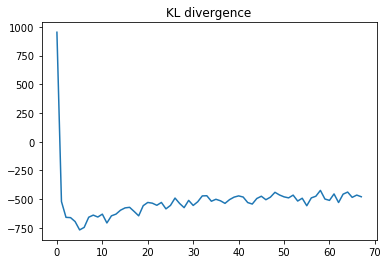

In [66]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

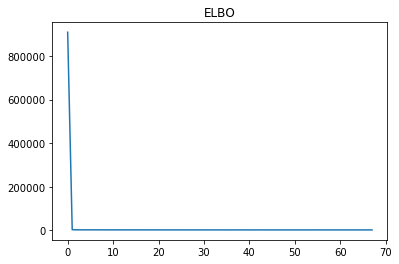

In [67]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


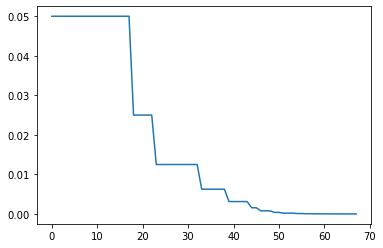

In [68]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


In [69]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('Predictive Variatiational Inference, GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

show(GeN,1000)
scores

TypeError: makePlot() takes 1 positional argument but 3 were given

In [70]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [71]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(1.0238), tensor(0.1000))
SE_valid: (tensor(0.1158), tensor(0.1629))
nLPP_test: (tensor(1.1159), tensor(0.5838))
SE_test: (tensor(0.3392), tensor(1.3768))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$